In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
    

In [2]:
train = pd.read_csv(r'../input/tabular-playground-series-may-2022/train.csv')
train.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,target
0,0,-1.373246,0.238887,-0.243376,0.567405,-0.647715,0.839326,0.113133,1,5,...,-2.540739,0.766952,-2.730628,-0.208177,1.363402,ABABDADBAB,67.609153,0,0,0
1,1,1.697021,-1.710322,-2.230332,-0.545661,1.113173,-1.552175,0.447825,1,3,...,2.278315,-0.633658,-1.217077,-3.782194,-0.058316,ACACCADCEB,377.096415,0,0,1
2,2,1.681726,0.616746,-1.027689,0.810492,-0.609086,0.113965,-0.708660,1,0,...,-1.385775,-0.520558,-0.009121,2.788536,-3.703488,AAAEABCKAD,-195.599702,0,2,1
3,3,-0.118172,-0.587835,-0.804638,2.086822,0.371005,-0.128831,-0.282575,3,2,...,0.572594,-1.653213,1.686035,-2.533098,-0.608601,BDBBAACBCB,210.826205,0,0,1
4,4,1.148481,-0.176567,-0.664871,-1.101343,0.467875,0.500117,0.407515,3,3,...,-3.912929,-1.430366,2.127649,-3.306784,4.371371,BDBCBBCHFE,-217.211798,0,1,1


In [3]:
test = pd.read_csv(r'../input/tabular-playground-series-may-2022/test.csv')
test.head()

,id,f_00,f_01,f_02,f_03,f_04,f_05,f_06,f_07,f_08,...,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30
0,900000,0.442517,0.174380,-0.999816,0.762741,0.186778,-1.074775,0.501888,6,6,...,-1.006400,-1.193879,-2.435736,-2.427430,-1.966887,5.734205,BAAABADLAC,99.478419,0,0
1,900001,-0.605598,-0.305715,0.627667,-0.578898,-1.750931,1.355550,-0.190911,1,3,...,2.382405,0.149442,1.883322,-2.848714,-0.725155,3.194219,AFABBAEGCB,-65.993825,1,0
2,900002,0.303990,2.445110,0.246515,0.818248,0.359731,-1.331845,1.358622,3,3,...,-7.026098,1.312277,-5.157192,1.714005,0.585032,0.066898,BBACABBKEE,-87.405622,0,1
3,900003,0.154053,0.260126,-1.367092,-0.093175,-1.111034,-0.948481,1.119220,0,0,...,-0.594532,-3.939475,1.754570,-2.364007,-1.003320,3.893099,AEBEAACQCC,-281.293460,0,0
4,900004,-1.651904,-0.424266,-0.667356,-0.322124,-0.089462,0.181705,1.784983,2,2,...,0.084906,-0.985736,-0.130467,-3.557893,1.210687,1.861884,AEBBBBDABF,25.629415,0,2


In [4]:
sub = pd.read_csv(r'../input/tabular-playground-series-may-2022/sample_submission.csv')
sub.head()

,id,target
0,900000,0.5
1,900001,0.5
2,900002,0.5
3,900003,0.5
4,900004,0.5


In [5]:
train.drop('id',axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)

In [6]:
print(f'train set have {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'test set have {test.shape[0]} rows and {test.shape[1]} columns.') 
print(f'sample_submission set have {sub.shape[0]} rows and {sub.shape[1]} columns.')

train set have 900000 rows and 32 columns.
test set have 700000 rows and 31 columns.
sample_submission set have 700000 rows and 2 columns.


In [7]:
train.isnull().sum()

f_00      0
f_01      0
f_02      0
f_03      0
f_04      0
f_05      0
f_06      0
f_07      0
f_08      0
f_09      0
f_10      0
f_11      0
f_12      0
f_13      0
f_14      0
f_15      0
f_16      0
f_17      0
f_18      0
f_19      0
f_20      0
f_21      0
f_22      0
f_23      0
f_24      0
f_25      0
f_26      0
f_27      0
f_28      0
f_29      0
f_30      0
target    0
dtype: int64

In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
f_00,900000.0,-0.000286,0.998888,-4.599856,-0.675490,0.001144,0.674337,4.749301
f_01,900000.0,0.001165,0.999193,-4.682199,-0.675162,0.002014,0.675021,4.815699
f_02,900000.0,0.001174,1.000514,-4.642676,-0.674369,0.002218,0.677505,4.961982
f_03,900000.0,-0.001368,1.000175,-4.658816,-0.676114,-0.002227,0.672544,4.454920
f_04,900000.0,-0.000571,1.000167,-4.748501,-0.675909,-0.001662,0.673789,4.948983
f_05,900000.0,0.000284,0.999875,-4.750214,-0.673437,-0.000438,0.675028,4.971881
f_06,900000.0,-0.000709,0.999942,-4.842919,-0.674876,-0.001492,0.674749,4.822668
f_07,900000.0,2.031460,1.656172,0.000000,1.000000,2.000000,3.000000,15.000000
f_08,900000.0,2.057998,1.590955,0.000000,1.000000,2.000000,3.000000,16.000000
f_09,900000.0,2.362431,1.637706,0.000000,1.000000,2.000000,3.000000,14.000000


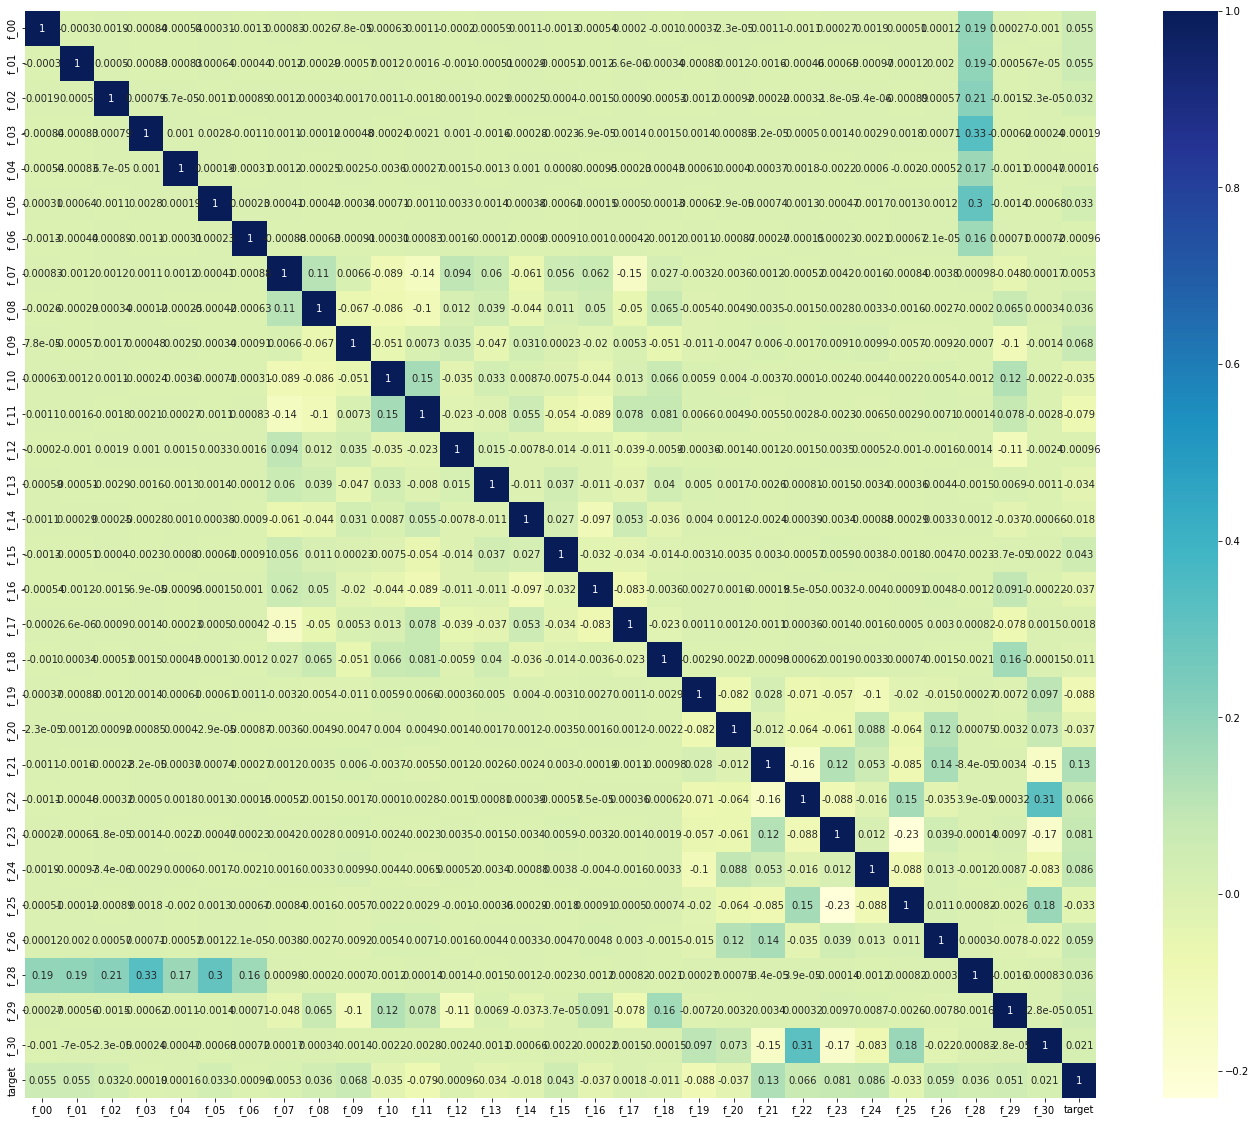

In [9]:
plt.figure(figsize=(24,20))
sns.heatmap(train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [10]:
cat = ['f_27']
X = train.drop('target',axis=1)
y = train['target']

In [11]:
from sklearn.model_selection import KFold
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

folds = KFold(n_splits=5, shuffle=True)

for fold, (trn_idx, val_idx) in enumerate(folds.split(X)):
    print(f"Fold: {fold}")
    X_train, X_test = X.iloc[trn_idx], X.iloc[val_idx]
    y_train, y_test = y.iloc[trn_idx], y.iloc[val_idx]

    model = CatBoostClassifier(n_estimators = 1500, 
                               cat_features = cat,
                               task_type="GPU",
                               bootstrap_type='Poisson')
   
    model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],
                early_stopping_rounds=400,
                verbose=False)
    y_pred = model.predict_proba(X_test)[:,1]
    roc = roc_auc_score(y_test, y_pred)
    
    print(f" roc_auc_score: {roc}")
    print("-"*50)

Fold: 0
 roc_auc_score: 0.9196348096078821
--------------------------------------------------
Fold: 1
 roc_auc_score: 0.9188649882387352
--------------------------------------------------
Fold: 2
 roc_auc_score: 0.9203278040263865
--------------------------------------------------
Fold: 3
 roc_auc_score: 0.9183358507928545
--------------------------------------------------
Fold: 4
 roc_auc_score: 0.9204689054411388
--------------------------------------------------


In [12]:
pred = model.predict_proba(test)[:,1]

In [13]:
sub['target'] = pred
sub.to_csv(f'cat.csv',index = False)

In [14]:
sub.head()

,id,target
0,900000,0.758257
1,900001,0.807820
2,900002,0.041537
3,900003,0.071903
4,900004,0.594695
